In [ ]:
# This notebook demonstrates methods for understanding/visualizingthe dataset/ dimension reduction/feature engineering
# Dataset: https://www.cis.fordham.edu/wisdm/dataset.php#actitracker
# We use: the accelerator raw data

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.signal import find_peaks

In [ ]:
# load the data
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('WISDM_ar_v1.1_raw.txt', header = None, names = columns)


33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;

Sampling rate: 
20Hz (1 sample every 50ms)

Fields:
*user
	nominal, 1..36

*activity
	nominal, {
		Walking
		Jogging
		Sitting
		Standing
		Upstairs
		Downstairs }

*timestamp
	numeric, generally the phone's uptime in nanoseconds
		(In future datasets this will be miliseconds
		since unix epoch.)

*x-acceleration
	numeric, floating-point values between -20 .. 20
		The acceleration in the x direction as measured
		by the android phone's accelerometer. 
		A value of 10 = 1g = 9.81 m/s^2, and
		0 = no acceleration.
		The acceleration recorded includes gravitational
		acceleration toward the center of the Earth, so
		that when the phone is at rest on a flat surface
		the vertical axis will register +-10. 

*y-accel
	numeric, see x-acceleration

*z-accel
        numeric, see x-acceleration


In [ ]:
df.shape

(1098204, 6)

In [ ]:
df.head()


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [ ]:
# identify missing values
df.isna().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       1
dtype: int64

In [ ]:

# calculate the percentage of missing values
df.isna().sum()/len(df)

user         0.000000e+00
activity     0.000000e+00
timestamp    0.000000e+00
x-axis       0.000000e+00
y-axis       0.000000e+00
z-axis       9.105776e-07
dtype: float64

In [ ]:
# drop na value
df = df.dropna()
df.shape

(1098203, 6)

In [ ]:
# We found that in z axis, there's a missing value
# Tips:
# We can use a threshold of percentage of missing values to decide if we can drop that data column
# In the following example, the percentage is 30%
mask = df.isna().sum()/len(df) < 0.3
print(mask)
reduced_df = df.loc[:,mask]
reduced_df.head()
# This dataset does not need to drop any column


user         True
activity     True
timestamp    True
x-axis       True
y-axis       True
z-axis       True
dtype: bool


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [ ]:
# remove ';' at the end of z-axis
df['z-axis'] = df['z-axis'].str.replace(';', '')
df['z-axis'] = df['z-axis'].apply(lambda x: float(x))

df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
# check the timestamp
df = df[df['timestamp'] != 0]
df.shape

(1085360, 6)

In [ ]:
# sort data
df.sort_values(['user', 'timestamp'], ascending=[True, True], inplace=True)

In [ ]:
# create a subset df with only x,y,z
columns = ['x-axis','y-axis','z-axis']
accel_df = df[columns]
accel_df.head()



,x-axis,y-axis,z-axis
941960,0.69,10.80,-2.03
941961,6.85,7.44,-0.50
941962,0.93,5.63,-0.50
941963,-2.11,5.01,-0.69
941964,-4.59,4.29,-1.95


In [ ]:
#create a correlation matrix
accel_df.corr()

,x-axis,y-axis,z-axis
x-axis,1.000000,0.028089,0.067903
y-axis,0.028089,1.000000,0.016396
z-axis,0.067903,0.016396,1.000000


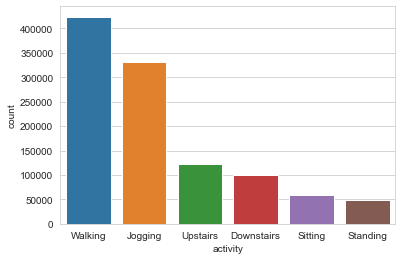

In [ ]:
# visualization
sns.set_style('whitegrid')
sns.countplot(x='activity',data=df)
plt.show()


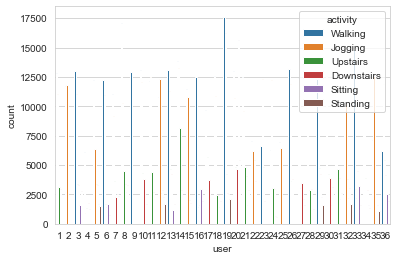

In [ ]:
# activities by users
sns.countplot(x = 'user', hue = 'activity', data = df)
plt.show()

<AxesSubplot:>

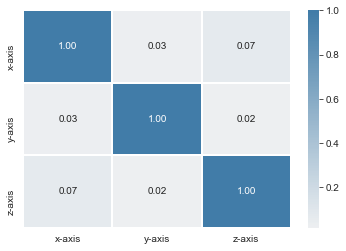

In [ ]:
# visualizing the correlation matrix
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap = True)
sns.heatmap(accel_df.corr(), center=0,cmap=cmap, linewidths=1, annot=True, fmt=".2f")

<AxesSubplot:>

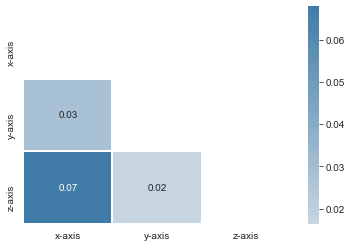

In [ ]:
# visualizing the correlation matrix for the upper triangle of the plot
mask = np.triu(np.ones_like(accel_df.corr(), dtype = bool))
sns.heatmap(accel_df.corr(), mask=mask,center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")              